# Clasificador de imagenes entre Chihuahas y Muffins

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd "/content/drive/MyDrive/IA/"
!ls

/content/drive/MyDrive/IA
chihuahuas_vs_muffins.h5  example_test	images	model.ipynb  tester.ipynb


# Importar librerías

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models, layers, optimizers
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

%matplotlib inline

print(tf.__version__)

Importa librerías necesarias para construir, entrenar y evaluar la red neuronal, así como para visualizar los resultados.

In [ ]:
!pip install --upgrade tensorflow

# Directorio de datos

In [ ]:
base_dir = 'images'
train_dir = 'images/train'
validation_dir = 'images/validation'
test_dir = 'images/test'

Se definen las rutas de los paths que contienen las imágenes para entrenamiento, validación y pruebas.

# Generador de datos para entrenamiento

In [ ]:
train_datagen = ImageDataGenerator(
							rescale = 1./255,
							rotation_range = 10,
							width_shift_range = 0.2,
							zoom_range = 0.3,
							horizontal_flip = True)
train_generator = train_datagen.flow_from_directory(
							train_dir,
							target_size = (128, 128),
							batch_size = 32,
							class_mode ='binary',
							)

Found 4735 images belonging to 2 classes.


Usando data augmentation, se crea un generador de datos de entrenamiento con transformaciones de imágenes para aumentar el dataset. Luego, carga las imágenes desde el directorio de entrenamiento, las redimensiona a 128x128 píxeles y las agrupa en batches de 32 imágenes.

# Generador de datos para pruebas

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=1,
    class_mode='binary',
    shuffle=False
)

Found 592 images belonging to 2 classes.


Se crea un generador de datos que solo reescala las imágenes.

# Generador de datos para validacion

In [ ]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

Found 592 images belonging to 2 classes.


Se crea un generador de datos que solo reescala las imágenes y guarda en bacth de 32 imagenes.

# Ejemplo de imagenes de data aumentation

(8, 128, 128, 3)
[0. 0. 1. 1. 0. 0. 0. 0.]


<Figure size 640x480 with 0 Axes>

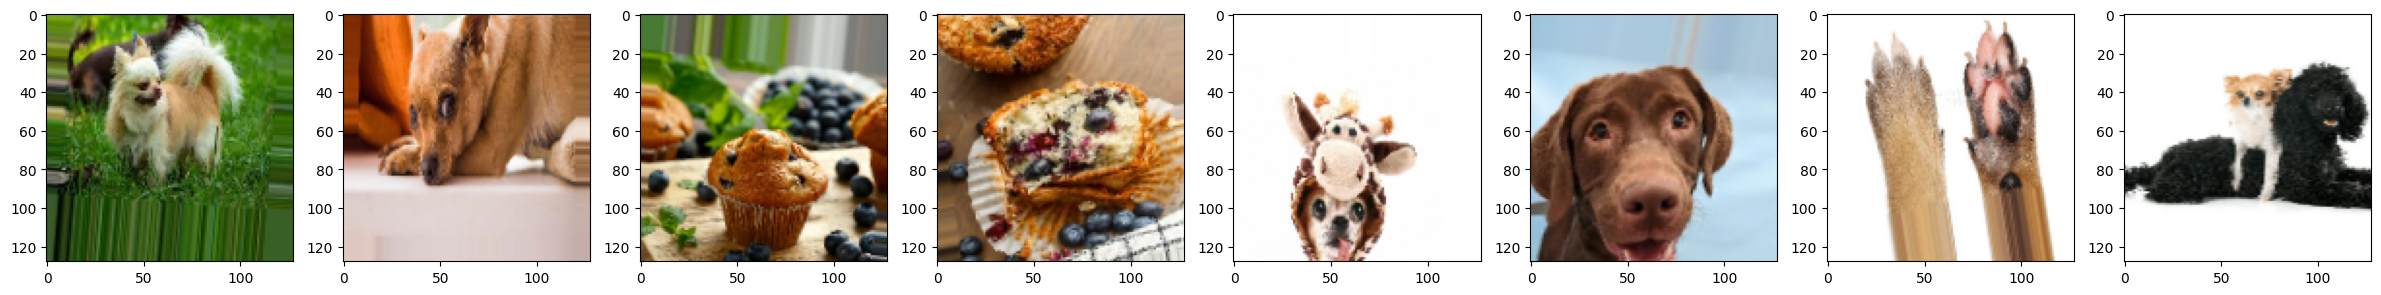

In [ ]:
images , labels = train_generator[0]

print(images.shape)
print(labels)


plt.figure()
f, axarr = plt.subplots(1, images.shape[0], figsize=(30, 4))

for i in range(images.shape[0]) :
  axarr[i].imshow(images[i])

# Construcción del modelo

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,939,329 (49.36 MB)

 Trainable params: 12,939,329 (49.36 MB)

 Non-trainable params: 0 (0.00 B)

Se define un modelo secuencial con tres capas convolucionales, se agregan capas de pooling, una capa de flattening, una capa densa y una capa de dropout para reducir el overfitting y termina en una capa de densa con activación sigmoide para clasificación binaria.

# Compliacion del modelo

In [ ]:
model.compile(
		 loss='binary_crossentropy',
		 optimizer=optimizers.RMSprop(learning_rate=2e-5),
		 metrics=['acc'])

Se compila el modelo con la función de pérdida `binary_crossentropy`, el optimizador Adam y accuracy.

# Entrenamiento del modelo

In [ ]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=5
)

Epoch 1/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 65s 392ms/step - acc: 0.5528 - loss: 0.6807 - val_acc: 0.7688 - val_loss: 0.5735
Epoch 2/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 75s 367ms/step - acc: 0.6672 - loss: 0.6056 - val_acc: 0.7688 - val_loss: 0.5107
Epoch 3/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 81s 357ms/step - acc: 0.7168 - loss: 0.5562 - val_acc: 0.7437 - val_loss: 0.5228
Epoch 4/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 56s 357ms/step - acc: 0.7323 - loss: 0.5464 - val_acc: 0.8036 - val_loss: 0.4393
Epoch 5/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 83s 369ms/step - acc: 0.7592 - loss: 0.5117 - val_acc: 0.7875 - val_loss: 0.4586
Epoch 6/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 79s 351ms/step - acc: 0.7783 - loss: 0.4884 - val_acc: 0.8500 - val_loss: 0.3851
Epoch 7/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 57s 357ms/step - acc: 0.7841 - loss: 0.4698 - val_acc: 0.8125 - val_loss: 0.4551
Epoch 8/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 64s 406ms/step - acc: 0.7871 - loss: 0.4649 - val_acc: 0.7946 - val_loss: 0.4352
Epoch 9/10
148/148 ━━━━━━━━━━━━━

Se entrena el modelo durante 10 épocas.

# Graficas de accuracy contra loss

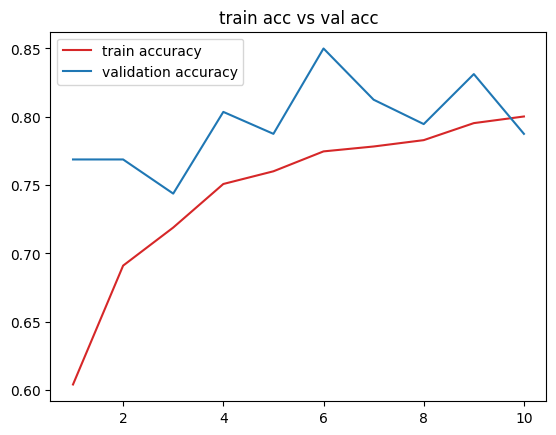

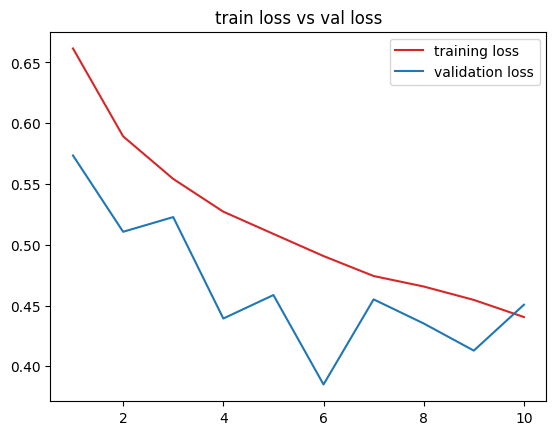

In [ ]:
acc = history.history['acc']
loss = history.history['loss']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'tab:red', label='train accuracy')
plt.plot(epochs, val_acc, 'tab:blue', label='validation accuracy')
plt.title('train acc vs val acc')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'tab:red', label='training loss')
plt.plot(epochs, val_loss, 'tab:blue', label='validation loss')
plt.title('train loss vs val loss')
plt.legend()

plt.show()

# Evaluacion del modelo

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print('\ntest acc :\n', test_acc)

592/592 ━━━━━━━━━━━━━━━━━━━━ 158s 266ms/step - acc: 0.8265 - loss: 0.3841

test acc :
 0.8310810923576355


# Guardar modelo

In [ ]:
model.save('chihuahuas_vs_muffins.h5')

592/592 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step


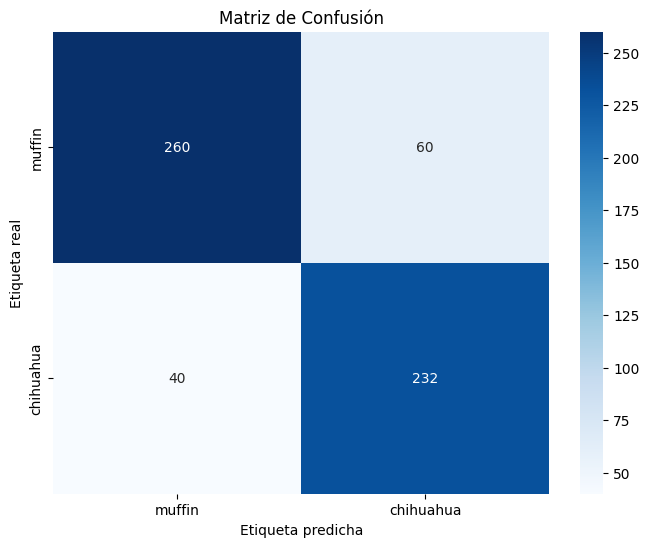

In [ ]:
test_generator.reset()
predictions = model.predict(test_generator)
binary_predictions = np.where(predictions >= 0.5, 1, 0)

test_labels = test_generator.classes

confusion_mat = confusion_matrix(test_labels, binary_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['muffin', 'chihuahua'], yticklabels=['muffin', 'chihuahua'])

plt.title('Matriz de Confusión')
plt.xlabel('Etiqueta predicha')
plt.ylabel('Etiqueta real')

plt.show()

Se crean predicciones con el modelo y convierte las probabilidades predichas en etiquetas binarias. Luego, obtiene las etiquetas reales de `test` y calcula la matriz de confusión.